In [15]:
import numpy as np
import os
import random
import tensorflow as tf
from six.moves import cPickle as pickle
from tensorflow.python.platform import gfile
import glob
import cv2
import matplotlib.image
import imageio
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data_dir = '../data/cityscapes_data/train/'

In [2]:
def Annotate_Images(data_dir='', n_ims=2975, offset_bias=0, img_dim=256,save_dir = ''):
    flist = os.listdir(data_dir)
    img0 = cv2.imread(data_dir+flist[0])

    y_dim,x_dim,_ = np.shape(img0)
    X = np.zeros((n_ims,y_dim,int(x_dim/2),3))
    y = np.zeros((n_ims,y_dim,int(x_dim/2),3))
    
    k = 0
    for f in flist[offset_bias:offset_bias+n_ims]:
        X[k] = cv2.imread(data_dir+f)[:,:img_dim]/img_dim
        y[k] = cv2.imread(data_dir+f)[:,img_dim:]/img_dim
        matplotlib.image.imsave(save_dir+f, X[k])
        matplotlib.image.imsave(save_dir+'annotations/'+f, y[k])
        k = k+1
    return X,y

In [4]:
from model import FCN8s, PSPNet50, ICNet, ENet

model = FCN8s() # or another model


Instructions for updating:
Use the `axis` argument instead




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



In [5]:
save_dir = "./output/"

In [8]:
ground_truth = []
preds = []
flist = os.listdir("../data/cityscapes_data/parsed/val")
for i in range(2):    
    img_path = "../data/cityscapes_data/parsed/val/"+flist[i]
    ground_truth.append(imageio.imread(img_path))
    model.read_input(img_path)  # read image data from path
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    model.load("./model/fcn.npy", sess)  # load pretrained model
    pred = model.forward(sess) # Get prediction 
    imageio.imwrite(save_dir + 'fcn' + '_' + model.img_name, pred[0]) #save output
    preds.append(pred)

successful load img: ../data/cityscapes_data/parsed/val/440.jpg


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


successful load img: ../data/cityscapes_data/parsed/val/336.jpg


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


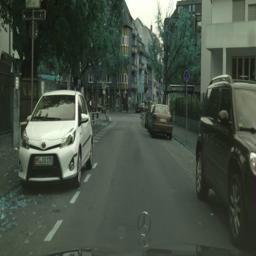

In [24]:
Image.open(img_path)

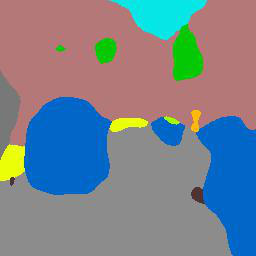

In [23]:
Image.open(save_dir + 'fcn' + '_' + model.img_name)